<a href="https://colab.research.google.com/github/mgersins-design/Machine-Learning/blob/main/HW3/Cancer_Type_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer


In [128]:
breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape

breast_input = pd.DataFrame(breast_data)
breast_input.head()

breast_labels = breast.target
breast_labels.shape

labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape

(569, 31)

In [129]:
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [130]:
features_labels = np.append(features, 'label')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [131]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

breast_dataset.tail()

/tmp/ipython-input-3420149812.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  breast_dataset['label'].replace(0, 'Benign',inplace=True)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [132]:
X = breast_dataset.drop(columns='label', axis=1).values
Y = breast_dataset['label'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, Y_train)
    print('C:', c)
    print('Training accuracy:', clf.score(X_train, Y_train))
    print('Test accuracy:', clf.score(X_test, Y_test))
    print('')

C: 10
Training accuracy: 0.9912087912087912
Test accuracy: 0.956140350877193

C: 1
Training accuracy: 0.989010989010989
Test accuracy: 0.9736842105263158

C: 0.1
Training accuracy: 0.9802197802197802
Test accuracy: 0.9649122807017544

C: 0.001
Training accuracy: 0.37142857142857144
Test accuracy: 0.37719298245614036



In [133]:
# choosing the best C value with the highest test accuracy
clf = LogisticRegression(penalty='l1', C=1, solver='liblinear')
#clf = LogisticRegression(penalty=None)
clf.fit(X_train, Y_train)

print('Training accuracy:', clf.score(X_train, Y_train))
print('Test accuracy:', clf.score(X_test, Y_test))

Training accuracy: 0.989010989010989
Test accuracy: 0.9736842105263158


In [134]:
Y_pred = clf.predict(X_test)
Y_pred[0:9]

array(['Malignant', 'Benign', 'Benign', 'Malignant', 'Malignant',
       'Benign', 'Benign', 'Benign', 'Benign'], dtype=object)

In [135]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[42,  1],
       [ 2, 69]])

In [136]:
from sklearn import metrics

positive_label = 'Malignant'

print(f"Accuracy: {metrics.accuracy_score(Y_test, Y_pred)}")

# Add the pos_label parameter to specify the positive class
print(f"Precision: {metrics.precision_score(Y_test, Y_pred, pos_label=positive_label)}")
print(f"Recall: {metrics.recall_score(Y_test, Y_pred, pos_label=positive_label)}")
print(f"F1-Score: {metrics.f1_score(Y_test, Y_pred, pos_label=positive_label)}")

Accuracy: 0.9736842105263158
Precision: 0.9857142857142858
Recall: 0.971830985915493
F1-Score: 0.9787234042553191


Text(0.5, 427.9555555555555, 'Predicted label')

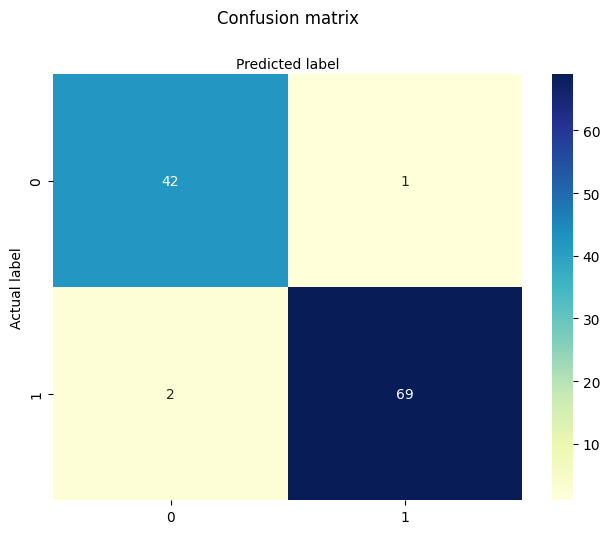

In [137]:
#Let's visualize the results of the model in the form of a co#nfusion matrix using matplotlib and seaborn.
#Here, you will visualize the confusion matrix using Heatmap.
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')